# Model Validation

In [1]:
import sys
import pandas as pd
import joblib
from yellowbrick.regressor import ResidualsPlot, PredictionError

pd.set_option("display.max_columns", None)

sys.path.append("../../")

## Load Data

In [2]:
training_set = pd.read_csv("../../data/training_set.csv")
testing_set = pd.read_csv("../../data/testing_set.csv")

In [3]:
# separating the feature columns from the target column
feature_columns = ["age", "sex", "bmi", "children", "smoker", "region"]
target_column = "charges"

X_train = training_set[feature_columns]
y_train = training_set[target_column]

X_test = testing_set[feature_columns]
y_test = testing_set[target_column]

## Load Model

In [4]:
model = joblib.load("../model_files/model.joblib")

/Users/brian/Code/regression-model/venv/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


## Generate Residuals Plot

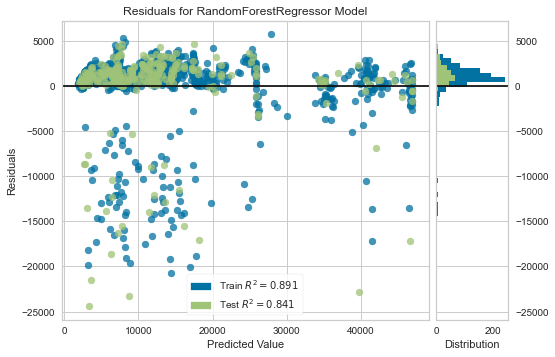

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [5]:
# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Generate Prediction Error Plot

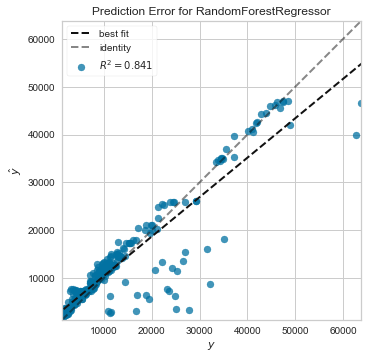

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [6]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()